In [ ]:
# example of text classification with Naive Bayes
# https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
# April 2021 - 2023

In [1]:
import sys
#clear all variables (from last session)
sys.modules[__name__].__dict__.clear()
import os, sys, time, random, itertools, shutil
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
print(data.target_names)
print(len(data.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
20


In [3]:
selected_categories = ['talk.religion.misc', 'soc.religion.christian','sci.space', 'comp.graphics', 'alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware']
train = fetch_20newsgroups(subset='train', categories=selected_categories)
test = fetch_20newsgroups(subset='test', categories=selected_categories)

In [4]:
#get and example of the training data
print(train.data[3])
print(len(train.data))

From: anasaz!karl@anasazi.com (Karl Dussik)
Subject: Re: Is "Christian" a dirty word?
Organization: Anasazi Inc Phx Az USA
Lines: 73

In article <Mar.25.03.53.08.1993.24855@athos.rutgers.edu> @usceast.cs.scarolina.edu:moss@cs.scarolina.edu (James Moss) writes:
>I was brought up christian, but I am not christian any longer.
>I also have a bad taste in my mouth over christianity.  I (in
>my own faith) accept and live my life by many if not most of the
>teachings of christ, but I cannot let myself be called a christian,
>beacuse to me too many things are done on the name of christianity,
>that I can not be associated with.  

A question for you - can you give me the name of an organization or a
philosophy or a political movement, etc., which has never had anything
evil done in its name?  You're missing a central teaching of Christianity -
man is inherently sinful.  We are saved through faith by grace.  Knowing
that, believing that, does not make us without sin.  Furthermore, not all
who c

In [5]:
# use the TF-IDF vectorizerand create a pipeline that attaches it to a multinomial naive Bayes classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [6]:
# fit the model to the data
model.fit(train.data, train.target)
labels = model.predict(test.data)

[[168   1   0   2   4 144   0]
 [  1 297  18  23  12  38   0]
 [  1  21 267  60   7  38   0]
 [  0   7  17 351   7  10   0]
 [  0   3   0   2 364  25   0]
 [  2   1   0   1   5 389   0]
 [ 32   3   1   0   6 167  42]]


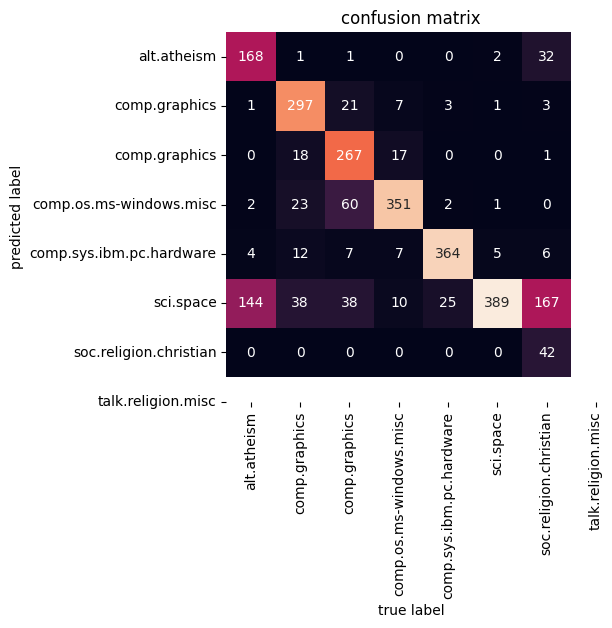

In [7]:
# show a heat map aka confusion matrix of the results
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt

mat = confusion_matrix(test.target, labels)
print(mat)
seaborn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.title('confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [9]:
# map label to category
def predict_category(s, train=train, model=model):
    predict = model.predict([s])
    return (train.target_names[predict[0]])

In [ ]:
predicted_category = predict_category('sending icecream to my mom!')
print(predicted_category)

alt.atheism


In [ ]:
predicted_category = predict_category('discussing islam vs atheism on a mac pro')
print(predicted_category)

alt.atheism


In [ ]:
#now try this:
predicted_category = predict_category('discussing islam vs chocolate icecream on a windows pc not a mac')
print(predicted_category)

comp.sys.ibm.pc.hardware


In [12]:
inputs = ["discussing islam vs atheism on a mac pro.", "sending icecream to my mom!", "discussing islam vs chocolate icecream on a windows pc not a mac."]
j = 0
for i in inputs:
    print(j)
    p_category = predict_category(i)
    print(i + ": " + p_category)
    j=j+1

0
discussing islam vs atheism on a mac pro.: alt.atheism
1
sending icecream to my mom!: alt.atheism
2
discussing islam vs chocolate icecream on a windows pc not a mac.: comp.sys.ibm.pc.hardware


In [ ]:
#now try this:
predicted_category = predict_category('discussing vanilla vs chocolate icecream')
print(predicted_category)

comp.sys.ibm.pc.hardware


In [ ]:
#now try this:
predicted_category = predict_category('thinking about the next mega million')
print(predicted_category)

sci.space


In [ ]:
# Set the data
my_selection = ['long live GOD', 'God is dead', 'Americans are here', 'Aliens are friendly']
results = []

In [ ]:
# Define a function to call the trained model,  based on a
# previously defined function and the skearn library
def check_selection(my_selection):
  for item in my_selection:
    p_category = predict_category(item)
    results.append(p_category)
  return(results)


In [ ]:
# Call the function to print the results
output = check_selection(my_selection)
print(output)

['soc.religion.christian', 'soc.religion.christian', 'alt.atheism', 'soc.religion.christian']
